# Apple cultivars

* **Data:** `apples.csv`
* **Description:** Types of apples
* **Source:** https://en.wikipedia.org/wiki/List_of_apple_cultivars
* **Columns of interest:**
    * `Common name` - the non-scientific name of the apple cultivar
    * `Origin` - where it came from
    * `First developed` - year it was developed
    * `Comment` - Description
    * `Use` - whether best for eating, baking, etc

Note that you'll need to brush up on `.str.contains` for this notebook.

## Read in your data

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

df= pd.read_csv("apples.csv")
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Common name,Origin,First developed,Comment,Use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,Introduced 1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,Introduced 1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


## Clean up the "First developed" column

Sometimes it's a year and sometimes it is an "introduced" year, like `Introduced 1826`. We just want all of them to be years, so feel free to remove the "Introduced" part.

In [2]:
df.columns=df.columns.str.replace(" ", "_").str.lower()
df

,common_name,origin,first_developed,comment,use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,Introduced 1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,Introduced 1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


## What percentage of apples are just for eating?

In [3]:
df.use.value_counts(normalize=True, dropna=False) * 100

Eating                                52.706078
Cooking                               11.990008
Cooking, Eating                        8.659450
NaN                                    8.409659
Eating, Cooking                        5.412157
                                        ...    
Cooking, Drying.                       0.083264
Eating, Cooking, Drying                0.083264
Cooking, (Eating)                      0.083264
Cooking (applesauce), Eating, Pies     0.083264
Eating, cider, juice                   0.083264
Name: use, Length: 73, dtype: float64

## Apples are from Kazakhstan, but they've spread since ancient times: calculate the top seven countries for apple cultivars in this dataset

In [4]:
df.origin.value_counts().head(7)

US         321
England    278
Germany     75
France      38
Sweden      35
Canada      32
Russia      17
Name: origin, dtype: int64

## Plot them with the longest bar at the top

<AxesSubplot:>

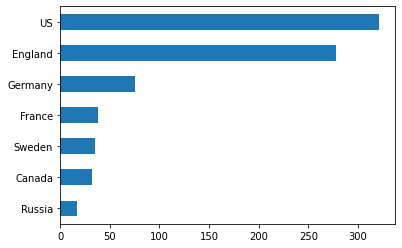

In [5]:
df.origin.value_counts().head(7).sort_values().plot(kind="barh")

## For apples described as "large" in their comment section, how often are they just for eating?

In [6]:
#df[df.comment.isna()]
df[df.comment.str.contains("large", case=False, regex=False, na=False)].use.value_counts()

Eating                           40
Cooking                          34
Cooking, Eating                  11
Eating, Cooking                  10
Eating, Baking etc.               1
Baking, (Cooking)                 1
Cider, Cooking, Eating            1
Cooking, Eating, Cider            1
Eating, pies                      1
Cooking (Apple Juice), Eating     1
Eating, Cooking.                  1
Cooking, Eating, Pie              1
Eating, Juice                     1
Multi-purpose                     1
Cooking, Jelly                    1
Eating, Cider                     1
Eating,Cooking                    1
Cooking.                          1
Cooking, Baking                   1
Cooking, Cider                    1
Cooking (Eating)                  1
Name: use, dtype: int64

## Save a CSV of just apples from before 1900, calling it `traditional.csv`

In [7]:
#df[df.first_developed<= 1990]
df.dtypes

common_name        object
origin             object
first_developed    object
comment            object
use                object
dtype: object

In [8]:
#df.first_developed.astype(float)
df.first_developed = df.first_developed.str.replace("Introduced", "").astype(float)
df.dtypes

common_name         object
origin              object
first_developed    float64
comment             object
use                 object
dtype: object

In [9]:
#df[df.first_developed.isna()]-- was supposed to transform it into int by dropping null values.
#But there is just to much NaN to just disregard. Will stick with float.

In [21]:
df

,common_name,origin,first_developed,comment,use
0,Abram,US,1850.0,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,1941.0,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768.0,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,1826.0,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900.0,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865.0,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830.0,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900.0,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


In [24]:
df_traditional = df[df.first_developed < 1990]
df_traditional.to_csv("traditional.csv", index=False)
df_traditional

,common_name,origin,first_developed,comment,use
0,Abram,US,1850.0,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,1941.0,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768.0,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,1826.0,A dessert apple. First introduced under the na...,Eating
6,Advance,England,1908.0,Early dessert apple. Medium size. Yellow with ...,Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900.0,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865.0,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830.0,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900.0,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


## What is the most recent apple cultivar from Russia?

In [30]:
df[df.origin=="Russia"].sort_values("first_developed", ascending=False)

,common_name,origin,first_developed,comment,use
561,Junost,Russia,1938.0,A yellow apple. P Gulkanel x Transparante Blan...,"Eating, Cooking"
45,Antonovka Safrannoje,Russia,1909.0,A large yellow apple with red flush. P Antonov...,"Eating, Cooking"
173,"Cardinal(syn. Kiarolkowski, Peter the Great)",Russia,1880.0,"AM from RHS in 1896. Flesh soft, white, juicy,...",Eating
191,Charlamoff,Russia,1880.0,Yellow with red flush. Tree small. Flesh white...,Eating
502,Hibernal,Russia,1870.0,"Fuit large, oblate-conic, yellow with red flus...",NaN
647,"Longfield,",Russia,1870.0,"W 83, H 75. Stalk 22 mm. Flesh, greenish, cris...",Eating
1051,Switzer,Russia,1870.0,"Flesh white, juicy, subacid, good. Biennial. P...","Cooking, Eating"
1070,Titovka(syn. Titus Apple),Russia,1870.0,"Flesh white, juicy, subacid, good to very good...",Cooking
132,Borgovskoje,Russia,1860.0,A sweet yellow apple. Pick late August.,Eating
40,"Anisovka(syn. Anis koritschnevoje, Anis polosa...",Russia,1850.0,"Medium size, round, greenish yellow with red s...","Cooking, Eating"


## How old are these apple cultivars?

You could use `.describe()`, but I want a graph. **What kind of chart do you use?** I want to see a graph that shows me a summary when these cultivars were discovered/introduced, not a graph of each individual one's year of introduction.

<AxesSubplot:>

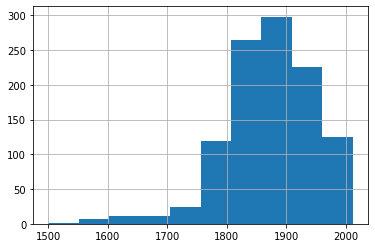

In [36]:
df.first_developed.hist()

## How old are most apple cultivars that are used for creating cider?

Cider used to be a big deal, so I would assume they're older. Include **anything that includes "Cider" anywhere in the `Use` description**. Make a graph, same as the last question.

<AxesSubplot:>

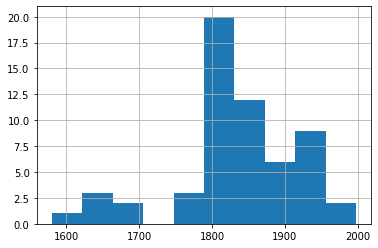

In [70]:
df[df.use.str.contains("Cider", case=False, regex=False, na=False)].first_developed.hist()